In [24]:
import numpy as np
import pandas as pd



In [66]:
# load result files as dataframes
df_win10 = pd.DataFrame( pd.read_json( 'bench_win10.json' ).launch.values.tolist() )
df_pi4_sd = pd.DataFrame( pd.read_json( 'bench_pi4_sdcard.json' ).launch.values.tolist() )
df_pi4_ram = pd.DataFrame( pd.read_json( 'bench_pi4_ramdisk.json' ).launch.values.tolist() )

In [186]:
# create result dataframes
test_means = pd.concat( [ df_pi4_ram.mean(), df_pi4_sd.mean() ], axis = 1 )
test_stds = pd.concat( [ df_pi4_ram.std(), df_pi4_sd.std() ], axis = 1 )

test_means

,0,1
0,1.831028,3.748991
1,2.290453,4.585746


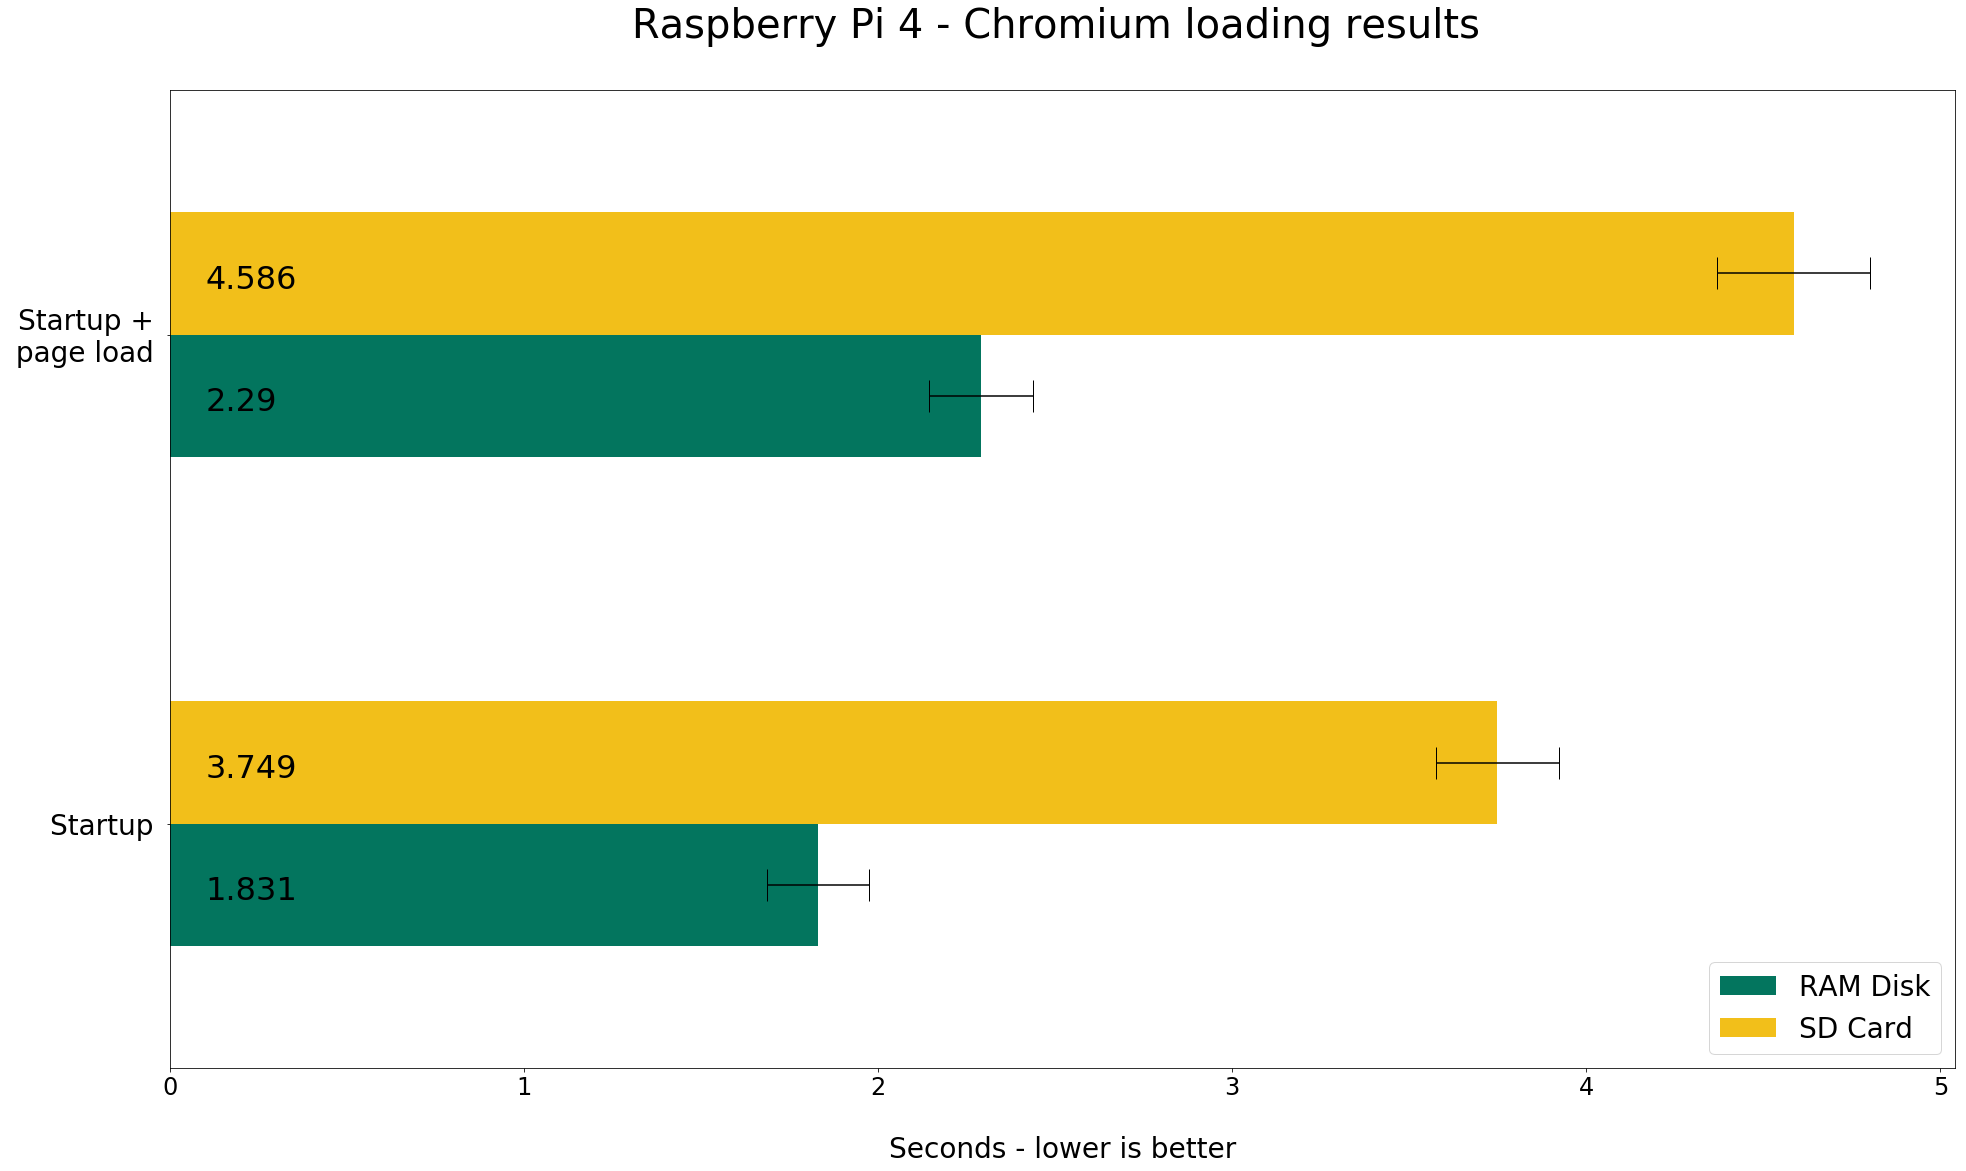

In [187]:
graph = test_means.plot.barh( xerr = test_stds, 
                     capsize = 16, 
                     figsize = ( 32, 18 ), 
                     fontsize = 24,
                     color = [ ( 0.01, 0.46, 0.37 ), ( 0.95, 0.75, 0.1 ) ] 
)

graph.set_title( 'Raspberry Pi 4 - Chromium loading results \n', fontsize = 40 )
graph.legend( [ 'RAM Disk', 'SD Card' ], fontsize = 28, loc = 'lower right' )

graph.set_xlabel( '\nSeconds - lower is better', fontsize = 28 )
graph.set_xticks( np.arange( 0, np.max( np.max( test_means ) ) * 1.25, 1 ) )
graph.set_yticklabels( [ 'Startup ', 'Startup + \n page load ' ], fontsize = 28 )

# set individual bar lables using above list
for i in graph.patches:
    graph.text( 0.1, i.get_y() + 0.095, str( round( ( i.get_width() ), 3 ) ), fontsize = 32, color = 'black' )
    
